# Importing

In [1]:
#install
!pip install geopy -q

In [2]:
!pip install -q basemap pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.


In [3]:
#libraries
import numpy as np
import pandas as pd
import dateutil.parser

#Visualisation
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#geocode
from geopy.geocoders import Nominatim

from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#load
file='/kaggle/input/significant-earthquakes/Significant_Earthquakes.csv'
df=pd.read_csv(file)

df.head()

Unnamed: 0                      time  latitude  longitude  depth   mag  \
0           0  1900-10-09T12:25:00.000Z     57.09    -153.48    NaN  7.86   
1           1  1901-03-03T07:45:00.000Z     36.00    -120.50    NaN  6.40   
2           2  1901-07-26T22:20:00.000Z     40.80    -115.70    NaN  5.00   
3           3  1901-12-30T22:34:00.000Z     52.00    -160.00    NaN  7.00   
4           4  1902-01-01T05:20:30.000Z     52.38    -167.45    NaN  7.00   

  magType  nst  gap  dmin  rms    net        id                   updated  \
0      mw  NaN  NaN   NaN  NaN  ushis  ushis391  2022-05-09T14:44:17.838Z   
1      ms  NaN  NaN   NaN  NaN  ushis  ushis393  2018-06-04T20:43:44.000Z   
2      fa  NaN  NaN   NaN  NaN  ushis  ushis395  2018-06-04T20:43:44.000Z   
3      ms  NaN  NaN   NaN  NaN  ushis  ushis397  2018-06-04T20:43:44.000Z   
4      ms  NaN  NaN   NaN  NaN  ushis  ushis400  2018-06-04T20:43:44.000Z   

                                place        type  horizontalError  \
0      16 km SW of Old Harbor, Alaska  earthquake              NaN   
1  12 km NNW of Parkfield, California  earthquake              NaN   
2             6 km SE of Elko, Nevada  earthquake              NaN   
3                     south of Alaska  earthquake              NaN   
4      113 km ESE of Nikolski, Alaska  earthquake              NaN   

   depthError  magError  magNst    status locationSource magSource  
0         NaN       NaN     NaN  reviewed          ushis        pt  
1         NaN       NaN     NaN  reviewed          ushis       ell  
2         NaN       NaN     NaN  reviewed          ushis       sjg  
3         NaN       NaN     NaN  reviewed          ushis       abe  
4         NaN       NaN     NaN  reviewed          ushis       abe

# Global EarthQuakes distribution

In [5]:
fig=px.scatter(df,x='depth',y='mag',color='mag',
               color_continuous_scale='darkmint'
              )
fig.update_layout(title='Earthquake Distribution',
                 title_x=0.5,
                 titlefont_size=16)

fig.show()

In [6]:
fig = go.Figure(go.Densitymapbox(lat=df.latitude, lon=df.longitude, 
                                 z=df.mag,radius=10, colorscale = 'Hot',
                                 hovertemplate = "mag: %{z:.00001f} <extra></extra>"
                                ))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

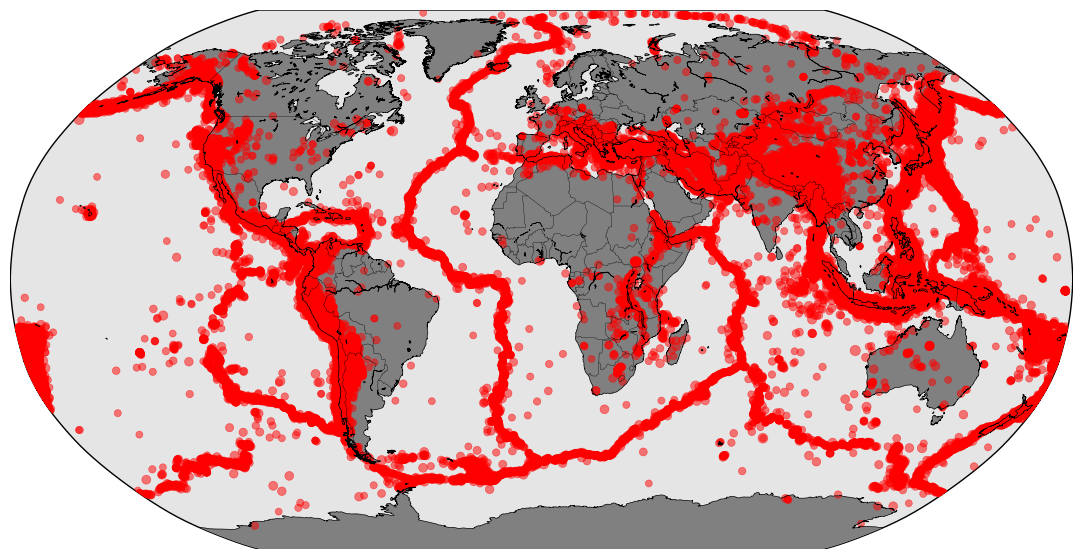

In [7]:
plt.figure(figsize=(14, 7))

# create a new map
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=0)

# draw coastlines, country boundaries, and fill the continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# convert latitude and longitude to map coordinates
x, y = map(df["longitude"].values, df["latitude"].values)

# plot the earthquake data
map.scatter(x, y, s=df["mag"].values**2, c='red', alpha=0.5)

# show the map
plt.show()

# Earthquakes over time

In [8]:
# extract year from the date column
df["year"] = pd.to_datetime(df["time"]).dt.year

# create a figure and a map object
fig = plt.figure(figsize=(12, 6))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0,
              lat_0=0, lon_0=0)

# define the animation function
def animate(i):
    # clear the previous plot
    plt.cla()

    # set the title to the current year
    year = i + 1900
    plt.title("Earthquakes - {}".format(year))

    # draw coastlines and fill continents
    map.drawcoastlines(linewidth=0.5)
    map.drawcountries(linewidth=0.25)
    map.fillcontinents(color='gray')

    # plot the earthquakes for the current year
    year_df = df[df["year"] == year]
    x, y = map(year_df["longitude"].values, year_df["latitude"].values)
    map.scatter(x, y, s=year_df["mag"].values**2, c='red', alpha=0.75)

# create the animation
ani = animation.FuncAnimation(fig, animate, frames=124, interval=500)

HTML(ani.to_html5_video())

plt.close()

display(HTML(ani.to_html5_video()))

In [9]:
# Extract the latitude, longitude, and magnitude columns
latitude = df['latitude']
longitude = df['longitude']
magnitude = df['mag']

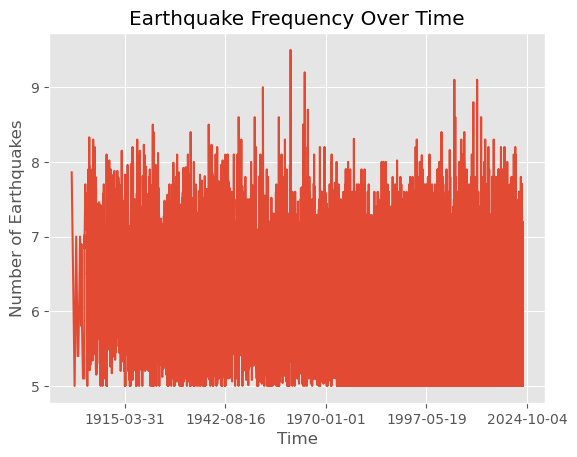

In [10]:
import matplotlib.dates as mdates

# Extract the time column
time = df['time']

# Convert the dates to numerical values
time_num = mdates.date2num(time)

# Create the line plot
plt.plot(time_num, magnitude)

# Add a title and labels to the axes
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()

# Density distribution of Earthquake magnitude

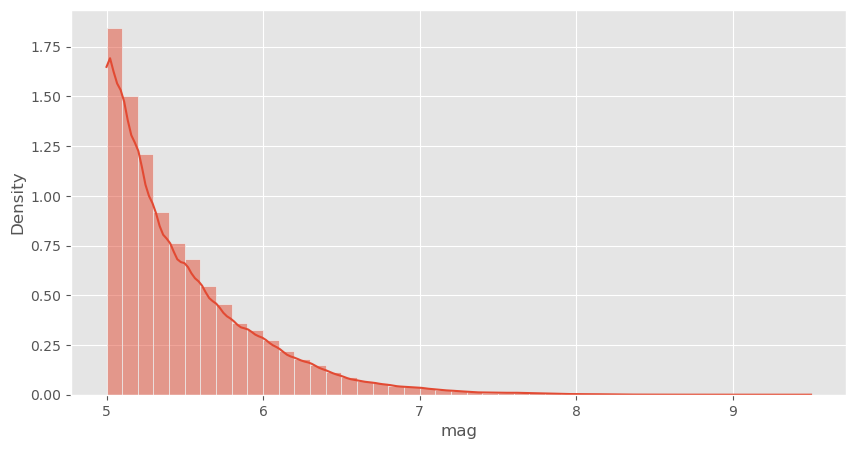

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mag', stat='density', binwidth=.1, kde=True)
plt.show()

# Density distribution of Earthquake Depth

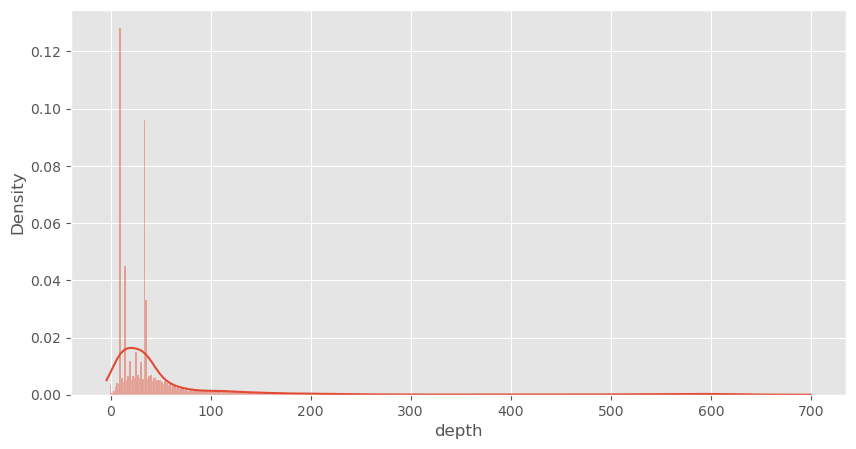

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='depth', stat='density', kde=True)
plt.show()

# Relationship b/w Magnitude and Depth

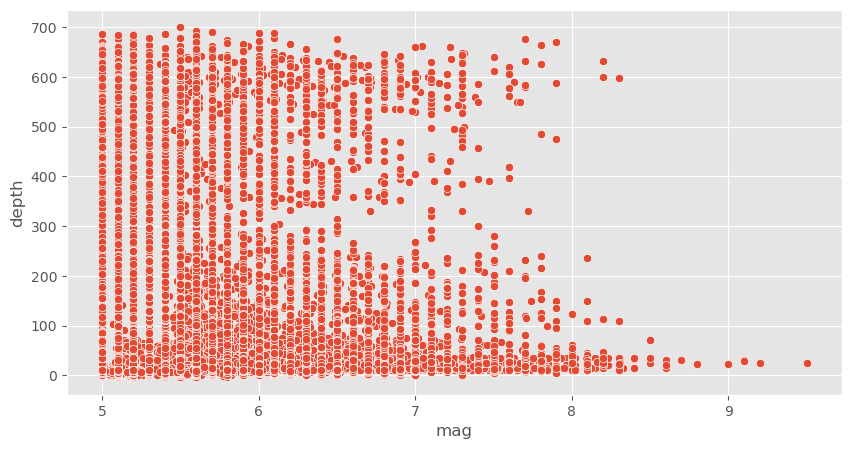

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='mag', y='depth')
plt.show()

# Splitting the dataset

In [14]:
df=pd.DataFrame(df)

In [15]:
# df = np.array(df)

In [16]:
# Fill missing values with a default value (e.g., 0)
df.fillna(0, inplace=True)

In [17]:
df = np.array(df)

In [18]:
!pip install transformers

In [19]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [20]:
X = df[:, 2:5]
y = df[:, 5]

y = y.astype('int')
X = X.astype('int')

X,y=make_classification(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train,y_train)

[[-1.71313453  1.74355119 -1.06762043 ...  0.62284993  0.04698059
  -0.45006547]
 [-0.5176113   0.50688537  0.58392819 ...  1.84670733  1.04416088
   0.68189149]
 [ 1.06667469 -0.47936995  0.02874482 ... -0.39333881 -0.81693567
   0.36867331]
 ...
 [ 0.84064355  0.37531604 -0.96697614 ...  0.42545756  0.76041466
   0.78580016]
 [ 0.49403019  0.63067073  1.1487657  ... -2.84854262 -0.37061433
   0.77169871]
 [-0.42018682 -0.24038388  0.9843224  ... -0.99835404  0.23421473
   1.55050049]] [0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 1 0 1]


# Standardizing the features

In [22]:
# #standardize the features using StandardScale
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

# Model Prediction

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sn

#   - Logistic Regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

1.0

# - KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5,p=1)
knn_clf.fit(X_train,y_train)
y_pred2=knn_clf.predict(X_test)

print(accuracy_score(y_test,y_pred2))

0.9


# - SVM

In [26]:
from sklearn.svm import SVC
svc_clf=SVC(kernel='linear',random_state=0)
svc_clf.fit(X_train,y_train)
y_pred3=svc_clf.predict(X_test)

print(accuracy_score(y_test,y_pred3))

1.0


# - Kernel SVM

In [27]:
from sklearn.svm import SVC
svc_clf1=SVC(kernel='rbf',random_state=1)
svc_clf1.fit(X_train,y_train)
y_pred4=svc_clf1.predict(X_test)

print(accuracy_score(y_test,y_pred4))

0.9


# - Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier(criterion='gini',random_state=0)
dtc_clf.fit(X_train,y_train)
y_pred6=dtc_clf.predict(X_test)

print(accuracy_score(y_test,y_pred6))

0.9


# - Random Forest

In [29]:
pipe1 = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe1.fit(X_train, y_train)  # apply scaling on training data

pipe1.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9